In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
import plotly.express as px

In [2]:
# Load Dataset

data = pd.read_csv("Dataset .csv")

In [3]:
# Convert to DataFrame
df = pd.DataFrame(data)
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

## Basic Preprocessing

In [5]:
# Drop duplicates
df.drop_duplicates(inplace=True)

In [6]:
# Check and handle missing values
print(df.isnull().sum())
df.fillna({
    "Cuisines": "Unknown",
    "City": "Unknown",
    "Locality": "Unknown",
    "Longitude": 0,
    "Latitude": 0,
    "Average Cost for two": df['Average Cost for two'].median(),
    "Aggregate rating": df['Aggregate rating'].median()
}, inplace=True)


Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


## Outlier Detection & Treatment

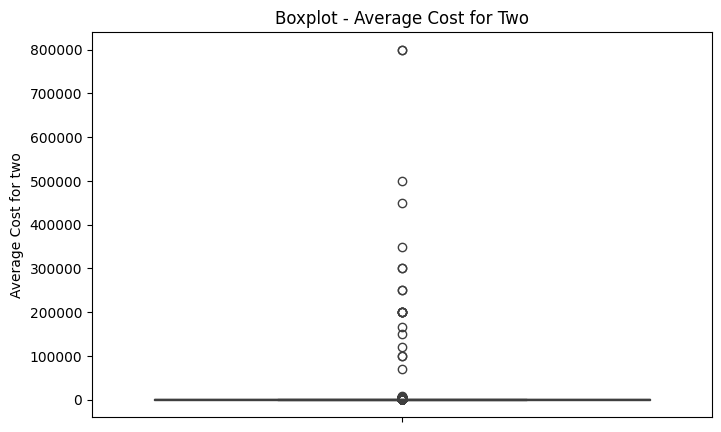

In [7]:
# Boxplot for cost
plt.figure(figsize=(8,5))
sns.boxplot(df['Average Cost for two'])
plt.title("Boxplot - Average Cost for Two")
plt.show()


In [8]:
# IQR method
Q1 = df['Average Cost for two'].quantile(0.25)
Q3 = df['Average Cost for two'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

In [9]:
df['Average Cost for two'] = np.where(df['Average Cost for two'] > upper_limit, upper_limit, df['Average Cost for two'])
df['Average Cost for two'] = np.where(df['Average Cost for two'] < lower_limit, lower_limit, df['Average Cost for two'])


## Feature Selection & Scaling

In [10]:
features = ['Average Cost for two', 'Aggregate rating']

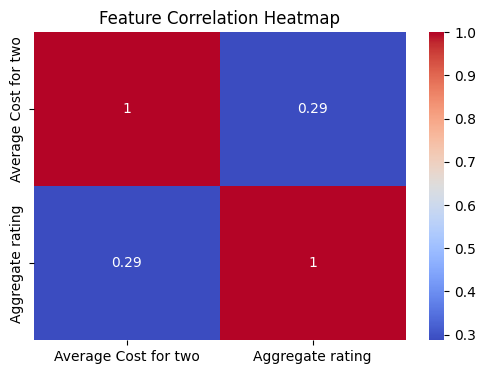

In [11]:
# Correlation
plt.figure(figsize=(6,4))
sns.heatmap(df[features].corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [12]:
# Scaling
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])
df_scaled = pd.DataFrame(df_scaled, columns=features)

In [14]:
# Skewness
print(f"Skewness of Cost: {df['Average Cost for two'].skew()}")
print(f"Skewness of Rating: {df['Aggregate rating'].skew()}")


Skewness of Cost: 0.9841986924889259
Skewness of Rating: -0.9541304733200109


## Analysis and Plots

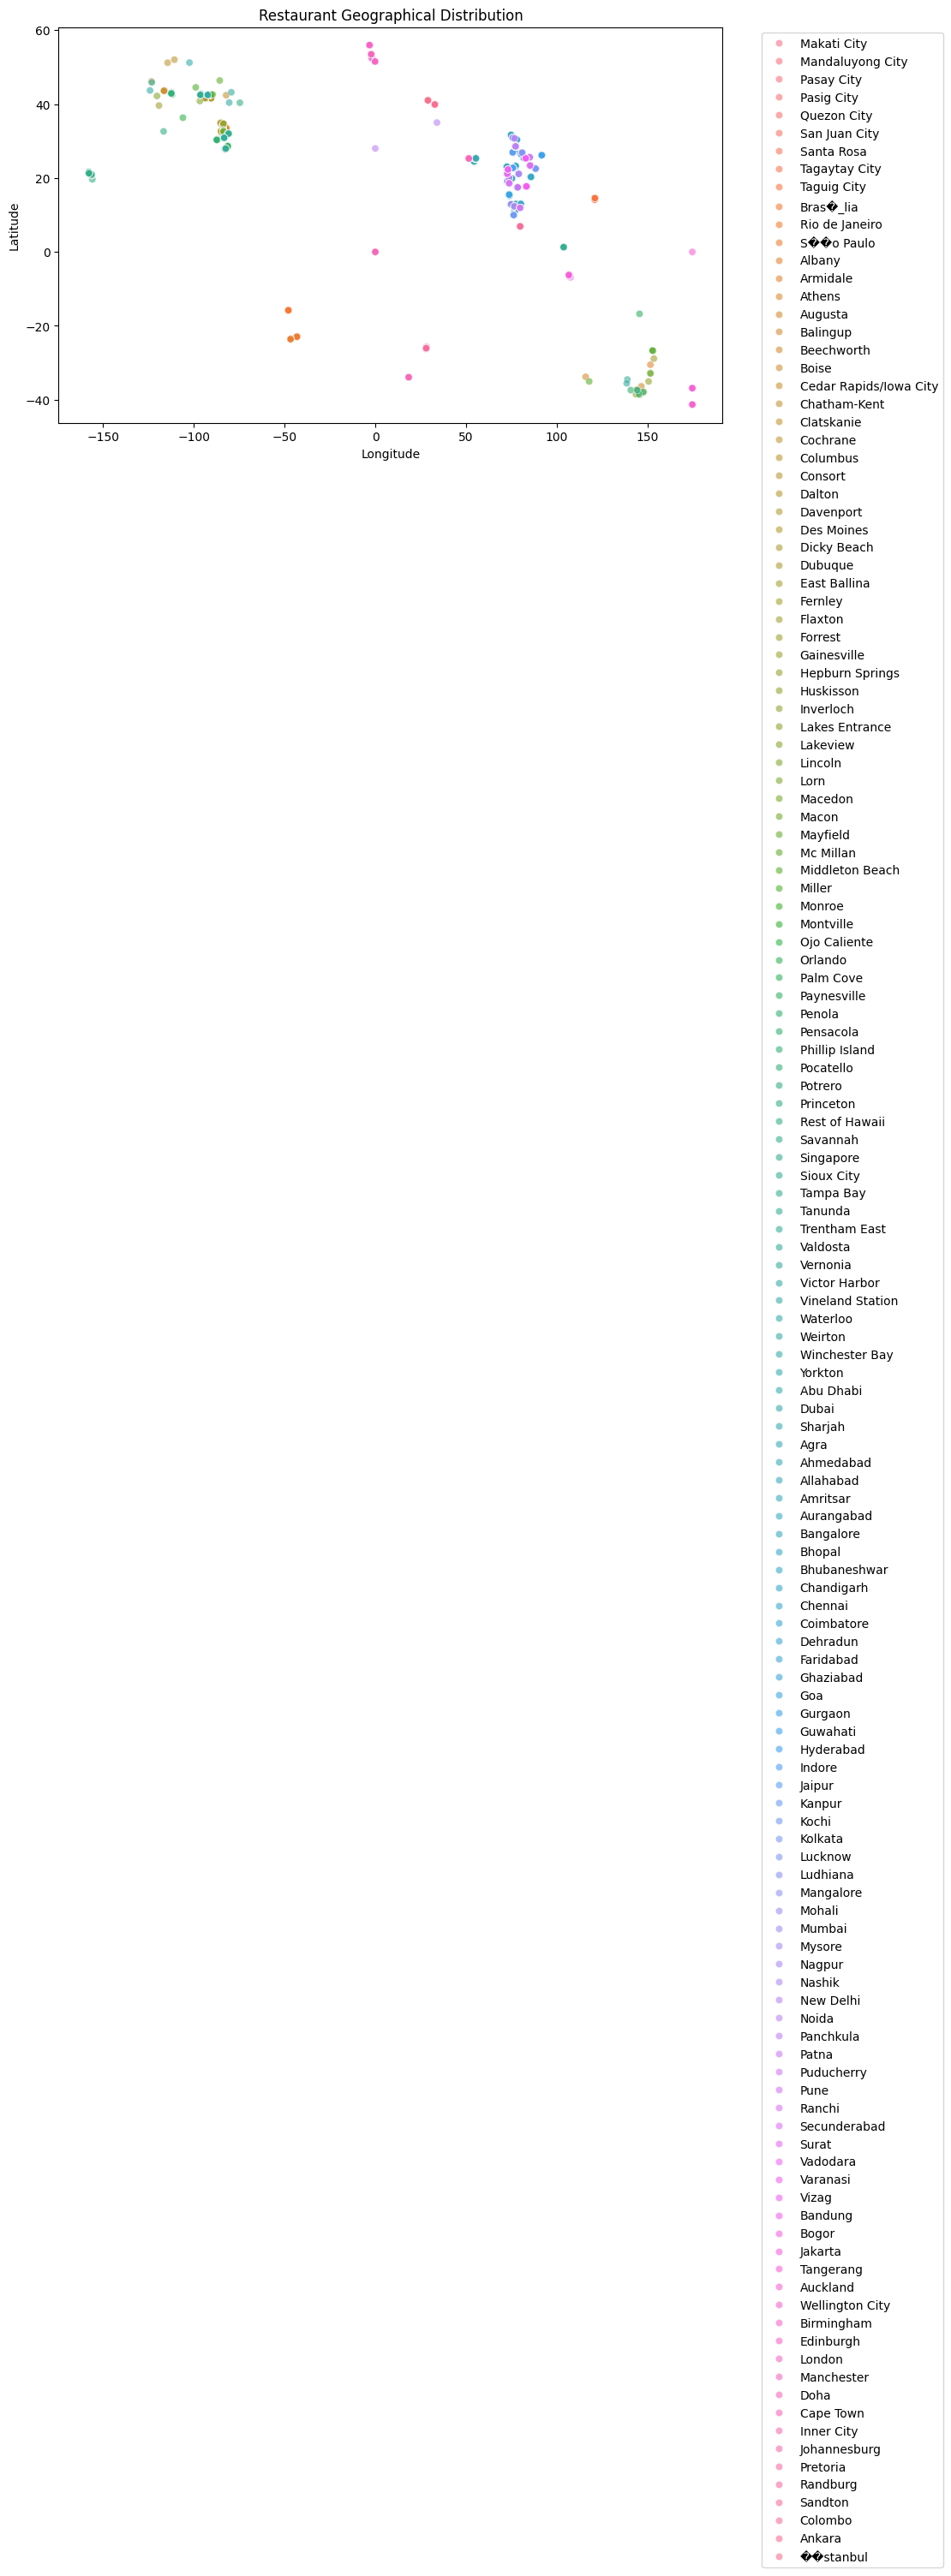

In [15]:
# Geographical Distribution (Static)

plt.figure(figsize=(10,6))
sns.scatterplot(x=df['Longitude'], y=df['Latitude'], hue=df['City'], alpha=0.6)
plt.title("Restaurant Geographical Distribution")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [16]:
# Interactive Map (Plotly)

fig = px.scatter_geo(
    df,
    lon='Longitude',
    lat='Latitude',
    color='Aggregate rating',
    hover_name='Restaurant Name',
    scope='world',
    title="Restaurants on World Map",
    color_continuous_scale="viridis"
)
fig.show()

/tmp/ipython-input-17-3865371668.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




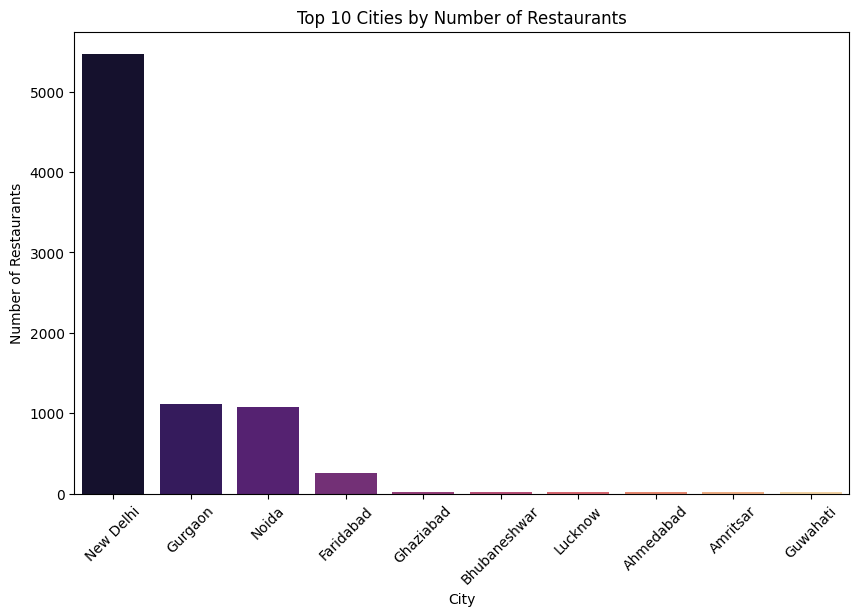

In [17]:
# City-Level Analysis
# Restaurants per city

city_counts = df['City'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=city_counts.index, y=city_counts.values, palette='magma')
plt.title("Top 10 Cities by Number of Restaurants")
plt.xlabel("City")
plt.ylabel("Number of Restaurants")
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-18-2181172097.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




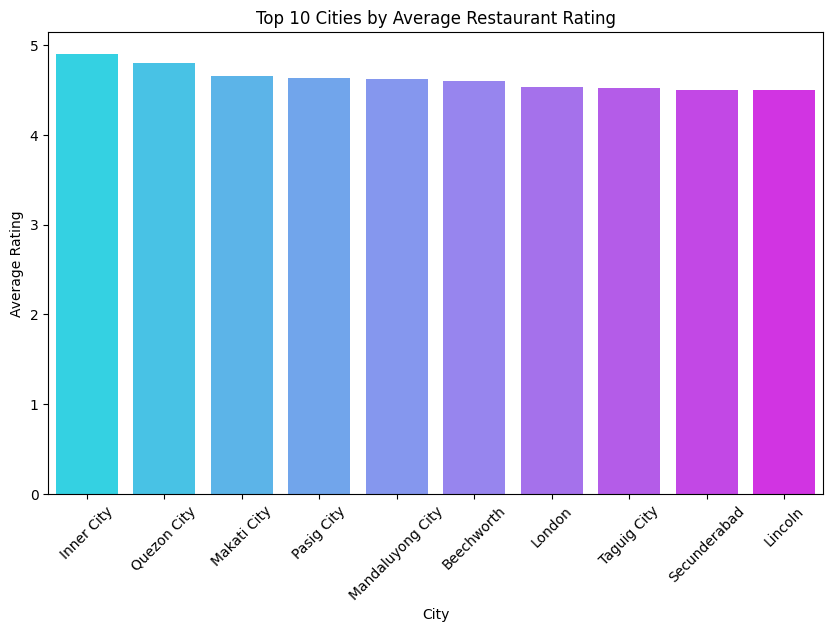

In [18]:
# Average rating by city

avg_rating_city = df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=avg_rating_city.index, y=avg_rating_city.values, palette='cool')
plt.title("Top 10 Cities by Average Restaurant Rating")
plt.xlabel("City")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-19-3419972734.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




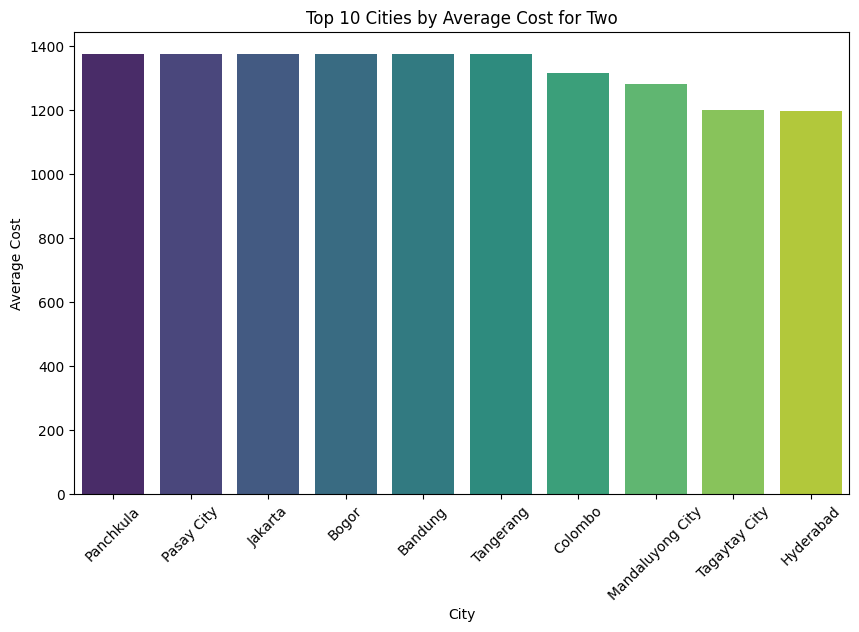

In [19]:
# Average cost by city

avg_cost_city = df.groupby('City')['Average Cost for two'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=avg_cost_city.index, y=avg_cost_city.values, palette='viridis')
plt.title("Top 10 Cities by Average Cost for Two")
plt.xlabel("City")
plt.ylabel("Average Cost")
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-20-4236243676.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




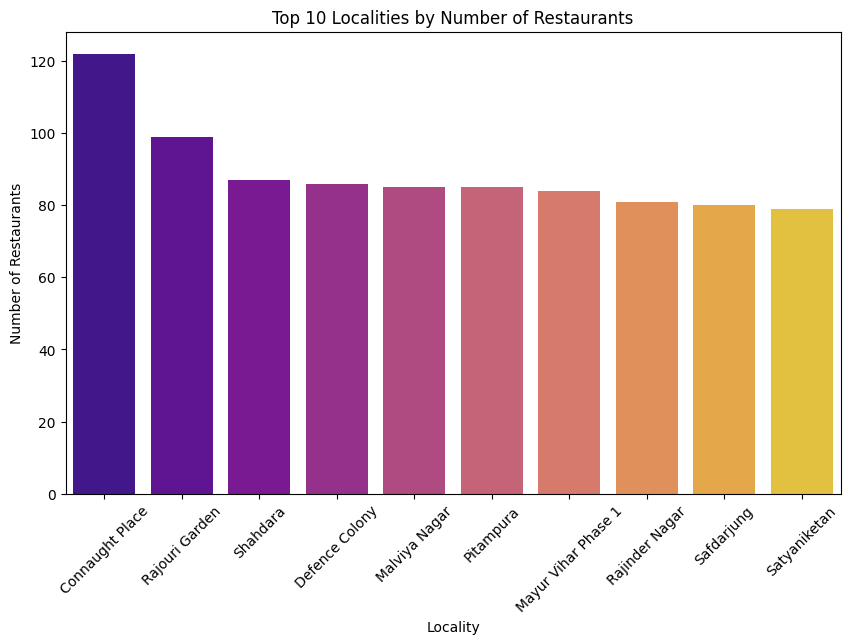

In [20]:
# Locality-Level Analysis

locality_counts = df['Locality'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=locality_counts.index, y=locality_counts.values, palette='plasma')
plt.title("Top 10 Localities by Number of Restaurants")
plt.xlabel("Locality")
plt.ylabel("Number of Restaurants")
plt.xticks(rotation=45)
plt.show()


## Insights

- Major restaurant clusters exist in a few key cities and popular localities.
- Higher average costs often correlate with higher ratings — suggests premium dining segments.
- Interactive map reveals geographic spread and rating hotspots.
- Some cities have many restaurants but relatively lower average ratings — an opportunity for quality improvement.
- Outlier treatment stabilized cost distributions and improved city-level statistics.
